# HW5

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import timeit
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
trainingData = pd.read_csv('gisette_train.data', delim_whitespace=True).values
trainingLabels = pd.read_csv('gisette_train.labels', delim_whitespace=True).values
testData = pd.read_csv('gisette_valid.data', delim_whitespace=True).values
testLabels = pd.read_csv('gisette_valid.labels', delim_whitespace=True).values

In [3]:
##### Set up logistic regression
lReg = LogisticRegression(max_iter=250000)
start = timeit.default_timer()
lReg.fit(trainingData, trainingLabels.ravel())
stop = timeit.default_timer()
# Predict
predictions = lReg.predict(testData)

# Analyze score = logisticRegr.score(testData, testLabels)results
score = lReg.score(testData, testLabels)
print('Time: ', stop - start)  
print(score)

D:\UCU\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Time:  3.3249889678968763
0.9819819819819819


In [4]:
ns1 = [5, 10, 20, 50, 100]
res = []
tst = []
for n in ns1:
    pca = PCA(n_components=n)
    pca.fit(trainingData)    
    trainingDataN = pca.transform(trainingData)
    testDataN = pca.transform(testData)
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    start = timeit.default_timer()
    logisticRegr.fit(trainingDataN, trainingLabels)
    predictions = logisticRegr.predict(testDataN)
    stop = timeit.default_timer()
    score = logisticRegr.score(testDataN, testLabels)
    tst.append(score)
    res.append(pca.explained_variance_ratio_.sum())
    
    print(n)
    print('Time: ', stop - start)
    print(score)

D:\UCU\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
Time:  0.3032791321596573
0.8548548548548549


D:\UCU\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10
Time:  0.029487419056758668
0.9179179179179179


D:\UCU\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20
Time:  0.028117344441419334
0.9369369369369369


D:\UCU\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50
Time:  0.021991909922730812
0.96996996996997
100
Time:  0.10652685689949948
0.9669669669669669


D:\UCU\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\UCU\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


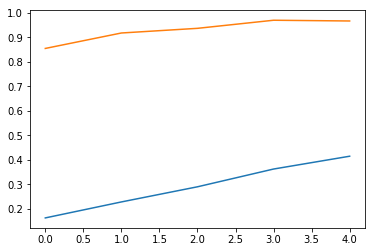

In [5]:
plt.plot(res)
plt.plot(tst)

As we see, this method takes a lot of time to train a model, so it is now too efficent way, even if it gives us a good acuracy

D:\UCU\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3
Time:  0.00526498973431444
0.7407407407407407


D:\UCU\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
Time:  0.00831447242052974
0.8578578578578578


D:\UCU\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10
Time:  0.011708449070006566
0.9179179179179179


D:\UCU\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20
Time:  0.010560004171857429
0.9459459459459459


D:\UCU\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50
Time:  0.015649586429461237
0.9769769769769769


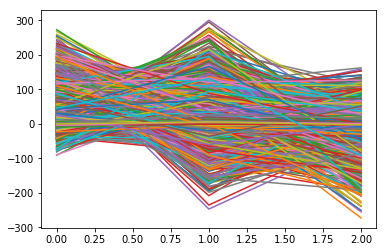

In [6]:
ns2 = [3, 5, 10, 20, 50]
for n in ns2:
    fa = FactorAnalysis(n_components=n)
    fa.fit(trainingData)
    trainingDataN = fa.transform(trainingData)
    testDataN = fa.transform(testData)
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    start = timeit.default_timer()
    logisticRegr.fit(trainingDataN, trainingLabels)
    predictions = logisticRegr.predict(testDataN)
    stop = timeit.default_timer()
    score = logisticRegr.score(testDataN, testLabels)
    if n == 3:
        plt.plot(fa.components_)
    print(n)
    print('Time: ', stop - start)
    print(score)

With PCA the accuracy of our madel is higher. But it works not so fast as FA. Principal components analysis and factor analysis are similar because both analyses are used to simplify the structure of a set of variables. However, the analyses differ in several important ways

1) In principal components analysis, the components are calculated as linear combinations of the original variables. In factor analysis, the original variables are defined as linear combinations of the factors.

2) In principal components analysis, the goal is to explain as much of the total variance in the variables as possible. The goal in factor analysis is to explain the covariances or correlations between the variables.

# HW6

In [8]:
input_data = np.loadtxt('spambase.data', delimiter = ',', dtype = float)
np.random.shuffle(input_data)
X, target = input_data[:,:-1], input_data[:,-1]
#Splitting the train and test inputs/ targets
train_input, test_input, train_target, test_target = train_test_split(X, target, test_size = 0.50)

In [13]:
lReg = LogisticRegression(max_iter=250000, solver="newton-cg")
start = timeit.default_timer()
lReg.fit(train_input, train_target)
stop = timeit.default_timer()
predictions = lReg.predict(test_input)

score = lReg.score(test_input, test_target)
print('Time: ', stop - start)  
print(score)

Time:  0.11894167661893107
0.9274228596262495


In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

knn = KNeighborsClassifier(n_neighbors=4)
sfs = SFS(knn, 
          k_features=(1, train_input.shape[1]), 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
start = timeit.default_timer()
sfs = sfs.fit(train_input, train_target)
stop = timeit.default_timer()

print('\nSequential Forward Selection (k=3):')
print('Time: ', stop - start)
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
Time:  47.76349857323402
(3, 6, 15, 16, 19, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 51, 52)
CV Score:
0.9304345722028649


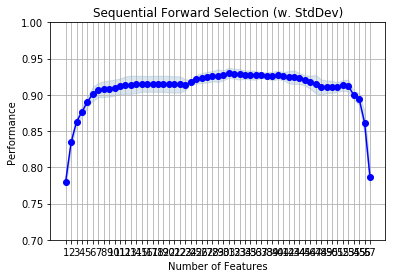

In [15]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [16]:
sbs = SFS(knn, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=3,
          n_jobs=-1)
sbs = sbs.fit(train_input, train_target)

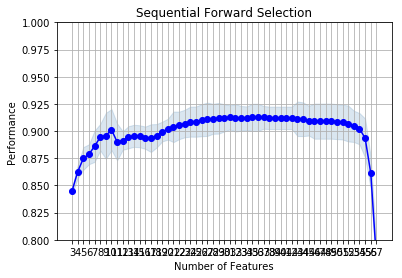

In [17]:
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [18]:
print('\nSequential Backward Selection (k=3):')
print('Time: ', stop - start)
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)


Sequential Backward Selection (k=3):
Time:  47.76349857323402
(6, 51, 54)
CV Score:
0.8447814152774988


We got different subsets and it's normal since Backward and Forward selections doesn't always same subset.

In [19]:
train = pd.DataFrame(train_input)
target = pd.DataFrame(train_target)

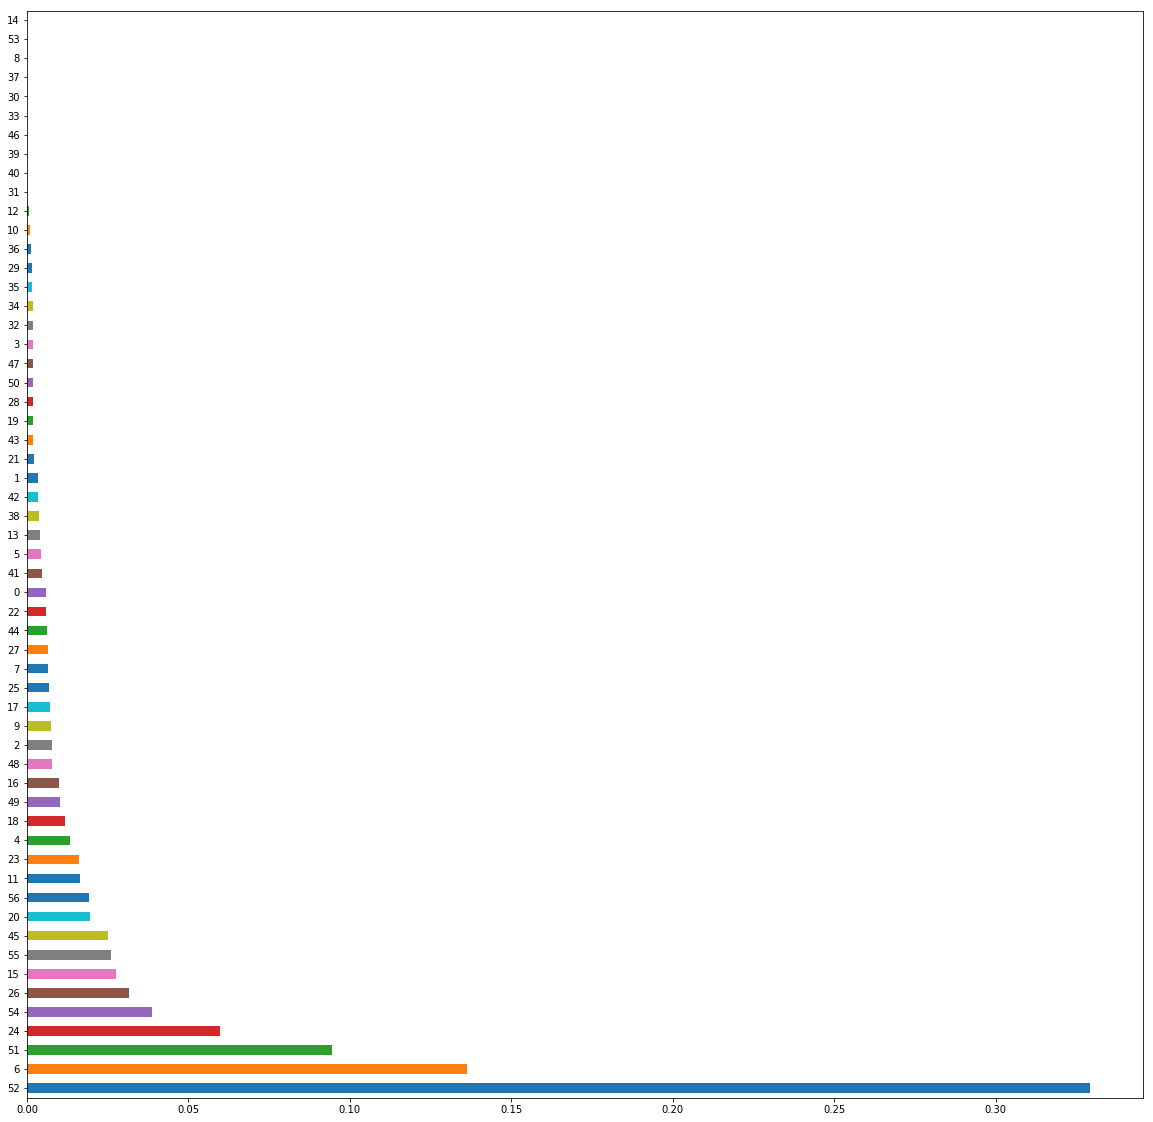

In [20]:
tree = DecisionTreeClassifier().fit(train, target)
feat_importances = pd.Series(tree.feature_importances_, index=train.columns)
feat_importances.nlargest(len(train.columns)).plot(kind='barh', figsize=(20, 20))

FSS and BSS folow the same principles but from different ways. Forward and backward stepwise selection is not guaranteed to give us the best model containing a particular subset of features, thats why in our case we gut slightly deffernet accuracy using BSS and FSS. This means the subsets were different